## Data Gathring

In [6]:
import pandas as pd
import re
import string
import seaborn as sns
from pyarabic.araby import strip_harakat
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer 
import nltk 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity


In [7]:
df_train = pd.read_csv("101121_news_source_HSEP_train.csv" )
df_test = pd.read_csv("101121_news_source_HSEP_test.csv" )
df = pd.concat([df_train, df_test], axis=0)

In [8]:
df.shape

(12225, 3)

In [9]:
df.head(10)

,ID,Subject,Content
0,0,سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف,<p>متابعة – مظفر إسماعيل</p><p> </p><p>نفى “ل...
1,1,ماذا يفعل القرنفل على الريق؟,<p>خبرني - القرنفل على الريق هي ذات الفوائد ال...
2,2,لن تتوقعها.. حيلة ذكية تجعل ثمرة الأفوكادو تنض...,<p>متابعة – علي معلا:</p><p>يحب الجميع تناول ف...
3,3,السعودية تستضيف اليابان ضمن 6 مباريات فى تصفيا...,تقام اليوم الخميس، 6 مواجهات ضمن مباريات الجول...
4,4,انتهاء التصويت.. صناديق الاقتراع العام تغلق في...,أعلنت المفوضية العليا للانتخابات في العراق عن ...
5,5,إنريكى: مواجهة إسبانيا ضد إيطاليا صعبة وسنلعب ...,أكد لويس انريكي المدير الفني لمنتخب اسبانيا عل...
6,6,"تنسيقية شباب الأحزاب تعد تقريرا بعنوان"" أكتوبر...",أعدت تنسيقية شباب الأحزاب والسياسيين تقريرا تح...
7,7,خلال اجتماعها ..”المواد الغذائية” ترفع تقريرًا...,<p>رفعت شعبة المواد الغذائية بغرفة القاهرة تقر...
8,8,السعودية تعطل الكمبيوتر الياباني في تصفيات مون...,<p>خبرني - حقق المنتخب السعودي فوزا ثمينا على...
9,9,اكرم يسرى جناح نادى الزمالك يحصل على لقب هداف ...,<p>احتل لاعب نادى الزمالك اكرم يسرى صدارة هداف...


## Cleaning

In [10]:
arabic_punctuations = '''«»`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
punctuations_list

'«»`÷×؛<>_()*&^%][ـ،/:"؟.,\'{}~¦+|!”…“–ـ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def clean(text):
    output = re.sub(r'\s*[A-Za-z]+\b', ' ' , text) #Remove english letters
    output = strip_harakat(output) #Remove harakat   
    translator = str.maketrans(' ',' ', punctuations_list) #remove arabic and english punctuations
    output = output.translate(translator)
    output = " ".join(output.split()) #remove extra spaces
    output = re.sub('\w*\d\w*', ' ', output)# Remove numbers
    return output.strip()

In [13]:
df.Content = df.Content.map(clean)
df.Subject = df.Subject.map(clean)
df["Text"] = df.Subject + " " + df.Content
df.drop(columns=["ID"], inplace=True)

In [14]:
df.tail()

,Subject,Content,Text
6108,مسيرة النفير الكبير اليوم رفضا لالانقلاب في تونس,في سياق حملة تحركات متواصلة حملت شعار يوم الحس...,مسيرة النفير الكبير اليوم رفضا لالانقلاب في تو...
6109,إنقاذ حياة طفلة كانت تعاني من ورم نادر,نجح فريق جراحة الأطفال والتدخل السريع بصحة جاز...,إنقاذ حياة طفلة كانت تعاني من ورم نادر نجح فري...
6110,إصابة المتحدث باسم الخارجية الأمريكية نيد براي...,أفادت فضائية العربية في خبر عاجل لها منذ قليل ...,إصابة المتحدث باسم الخارجية الأمريكية نيد براي...
6111,سعر الدولار اليوم الإثنين سبتمبر في العراق,هبطت أسعار صرف الدولار مقابل الدينار العراقي ف...,سعر الدولار اليوم الإثنين سبتمبر في العراق...
6112,لا تصدقها أبدا أشهر خرافات عن النوم ليس لا ت...,متابعة علي معلا النوم له دور حيوي ورئيسي في حي...,لا تصدقها أبدا أشهر خرافات عن النوم ليس لا ت...


## Save clean data

In [15]:
df.to_csv("clean_data.csv")

## Arabic Stopwords

In [16]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MedOo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))
arb_stopwords

{'ء',
 'ءَ',
 'آ',
 'آب',
 'آذار',
 'آض',
 'آمينَ',
 'آناء',
 'آنفا',
 'آه',
 'آها',
 'آهاً',
 'آهٍ',
 'آهِ',
 'آي',
 'أ',
 'أبدا',
 'أبريل',
 'أبو',
 'أبٌ',
 'أجل',
 'أجمع',
 'أحد',
 'أخبر',
 'أخذ',
 'أخو',
 'أخٌ',
 'أربع',
 'أربعاء',
 'أربعة',
 'أربعمئة',
 'أربعمائة',
 'أرى',
 'أسكن',
 'أصبح',
 'أصلا',
 'أضحى',
 'أطعم',
 'أعطى',
 'أعلم',
 'أغسطس',
 'أف',
 'أفريل',
 'أفعل به',
 'أفٍّ',
 'أقبل',
 'أقل',
 'أكتوبر',
 'أكثر',
 'أل',
 'ألا',
 'ألف',
 'ألفى',
 'أم',
 'أما',
 'أمام',
 'أمامك',
 'أمامكَ',
 'أمد',
 'أمس',
 'أمسى',
 'أمّا',
 'أن',
 'أنا',
 'أنبأ',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنتِ',
 'أنشأ',
 'أنى',
 'أنًّ',
 'أنّى',
 'أهلا',
 'أو',
 'أوت',
 'أوشك',
 'أول',
 'أولئك',
 'أولاء',
 'أولالك',
 'أوه',
 'أوّهْ',
 'أى',
 'أي',
 'أيا',
 'أيار',
 'أيضا',
 'أيلول',
 'أين',
 'أينما',
 'أيها',
 'أيّ',
 'أيّان',
 'أُفٍّ',
 'ؤ',
 'إحدى',
 'إذ',
 'إذا',
 'إذاً',
 'إذما',
 'إذن',
 'إزاء',
 'إلا',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'إليكنّ',
 'إليكَ',
 'إلَيْكَ',
 'إلّا',


In [18]:
documents = df.Text.copy()

vectorizer = TfidfVectorizer(stop_words=arb_stopwords)
X = vectorizer.fit_transform(documents)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


## K_mean

In [ ]:

#Drawing Elbow
import matplotlib.pyplot as plt
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=20,random_state=42,n_jobs = 1,algorithm='elkan')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Top terms per cluster:
Cluster 0:
 خلال
 كورونا
 المملكة
 رئيس
 المتحدة
 العام
 مجلس
 بن
 وزير
 اليوم
Cluster 1:
 حالة
 كورونا
 إصابة
 وفاة
 جديدة
 تسجيل
 الصحة
 إجمالي
 بفيروس
 عدد
Cluster 2:
 سعر
 للشراء
 للبيع
 المركزي
 بنك
 الدولار
 الدينار
 متوسط
 السودان
 الموازية
Cluster 3:
 يمكن
 الدم
 تناول
 الجسم
 القلب
 الإصابة
 النوم
 الوزن
 يساعد
 الشعر
Cluster 4:
 الذهب
 سعر
 عيار
 أسعار
 جرام
 دينارا
 تعاملات
 الدولار
 للأوقية
 سجل
Cluster 5:
 الدوري
 فى
 منتخب
 الفريق
 مباراة
 المباراة
 صلاح
 الزمالك
 محمد
 المنتخب


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:827: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn("algorithm='elkan' doesn't make sense for a single "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Ana

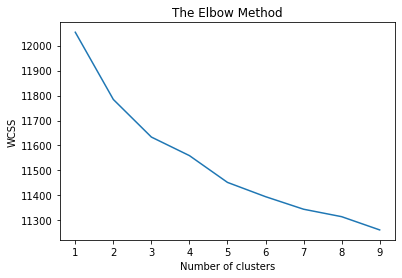

In [ ]:
true_k = 5
# model = KMeans(n_clusters=true_k, init='k-means++',random_state=60, max_iter=100, n_init=1)
model = KMeans(n_clusters=true_k, init='k-means++',max_iter=300,n_init=20,random_state=42,n_jobs = 1,algorithm='elkan')
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

In [181]:
documents.shape

(12225,)

### Results
> We can notice that topics are:
>> Cluster 0: Politics<br>
>> Cluster 1: Health<br>
>> Cluster 2: Economy<br>
>> Cluster 3: Health<br>
>> Cluster 4: Economy<br>
>> Cluster 5: Sports

In [ ]:
prediction = model.predict(X)
print(prediction)

[3 4 4 ... 4 1 4]


In [199]:
df["Topic_AR"] = prediction
df.Topic_AR.replace({0:"سياسة", 1:"صحة", 2:"إقتصاد", 3:"صحة", 4:"إقتصاد" ,5:"رياضة"}, inplace=True)

df["Topic_EN"] = prediction
df.Topic_EN.replace({0: "Politics", 1:"Health", 2:"Eco", 3:"Health", 4:"Eco", 5:"Sports" }, inplace=True)

In [200]:
df.head(30)

,Subject,Content,Text,Topic_AR,Topic_EN
0,سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف,متابعة مظفر إسماعيل نفى لويس سواريز تعمده إرسا...,سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف ...,صحة,Health
1,ماذا يفعل القرنفل على الريق,خبرني القرنفل على الريق هي ذات الفوائد التي يج...,ماذا يفعل القرنفل على الريق خبرني القرنفل على ...,إقتصاد,Eco
2,لن تتوقعها حيلة ذكية تجعل ثمرة الأفوكادو تنضج ...,متابعة علي معلا يحب الجميع تناول فاكهة الأفوكا...,لن تتوقعها حيلة ذكية تجعل ثمرة الأفوكادو تنضج ...,إقتصاد,Eco
3,السعودية تستضيف اليابان ضمن مباريات فى تصفيا...,تقام اليوم الخميس مواجهات ضمن مباريات الجولة...,السعودية تستضيف اليابان ضمن مباريات فى تصفيا...,صحة,Health
4,انتهاء التصويت صناديق الاقتراع العام تغلق في ع...,أعلنت المفوضية العليا للانتخابات في العراق عن ...,انتهاء التصويت صناديق الاقتراع العام تغلق في ع...,إقتصاد,Eco
5,إنريكى مواجهة إسبانيا ضد إيطاليا صعبة وسنلعب ب...,أكد لويس انريكي المدير الفني لمنتخب اسبانيا عل...,إنريكى مواجهة إسبانيا ضد إيطاليا صعبة وسنلعب ب...,صحة,Health
6,تنسيقية شباب الأحزاب تعد تقريرا بعنوان أكتوبر ...,أعدت تنسيقية شباب الأحزاب والسياسيين تقريرا تح...,تنسيقية شباب الأحزاب تعد تقريرا بعنوان أكتوبر ...,إقتصاد,Eco
7,خلال اجتماعها المواد الغذائية ترفع تقريرا لالع...,رفعت شعبة المواد الغذائية بغرفة القاهرة تقريرا...,خلال اجتماعها المواد الغذائية ترفع تقريرا لالع...,إقتصاد,Eco
8,السعودية تعطل الكمبيوتر الياباني في تصفيات مون...,خبرني حقق المنتخب السعودي فوزا ثمينا على نظيره...,السعودية تعطل الكمبيوتر الياباني في تصفيات مون...,صحة,Health
9,اكرم يسرى جناح نادى الزمالك يحصل على لقب هداف ...,احتل لاعب نادى الزمالك اكرم يسرى صدارة هدافين ...,اكرم يسرى جناح نادى الزمالك يحصل على لقب هداف ...,صحة,Health


In [149]:
df.to_csv("clustered.csv")

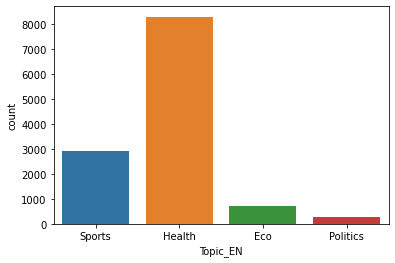

In [150]:
sns.countplot(data=df,x='Topic_EN');


# Save the model

In [151]:
# aa= pd.read_csv('test.csv')
# x = vectorizer.transform(aa)
# x    

In [152]:
# filename = "model1.model"
# pickle.dump(model, open(filename,"wb"))    #saving the model

In [153]:
# loaded_model = pickle.load(open('model1.model','rb'))
# loaded_model.predict(x)                        #using saved model to predict

# Using BoW for feature Extraction


In [154]:
# # Creating the Bag of Words model
# word2count = {}
# for data in dataset:
# 	words = nltk.word_tokenize(data)
# 	for word in words:
# 		if word not in word2count.keys():
# 			word2count[word] = 1
# 		else:
# 			word2count[word] += 1


# TF-IDF feature extraction


In [155]:
# # calculating tf-idf values
# from sklearn.feature_extraction.text import TfidfVectorizer
# import pandas as pd

# texts = {
# "good movie", "not a good movie", "did not like"
# }

# tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (1, 2))
# features = tfidf.fit_transform(texts)

# pd.Dataframe{
# 	features.todense(),
# 	columns = tfidf.get_feature_names()
# }


# Using K-means to Predict

In [202]:
test_1= pd.read_csv('test.csv')
test_1

,Subject,Content
0,"'غلق كلى لشارع الهرم بتقاطعه مع ""العمدة الجديد...",'علنت محافظة الجيزة، استكمال تسليم مواقع محطات...
1,'\r\nرئيس الوزراء يوافق على منح الجنسية المصري...,'وافق الدكتور مصطفى مدبولى ، رئيس الوزراء على ...
2,'قرار حكومى باعتبار مشروع إنشاء محور الفريق كم...,'أصدر الدكتور مصطفى مدبولى، رئيس الوزراء قرار ...
3,'\r\nأجواء معتدلة وشبورة كثيفة ونشاط رياح.. تف...,'كشفت الهيئة العامة للأرصاد الجوية، تفاصيل حال...
4,'\r\nدراسة دولية: كورونا تتسبب فى فقدان 28 ملي...,'قالت صحيفة واشنطن بوست إن دراسة دولية، تم الك...
5,'ماذا يفعل القرنفل على الريق','خبرني القرنفل على الريق هي ذات الفوائد التي ي...
6,'محمد محمود الخيار الرابع لموسيمانى فى وسط ملع...,'رغم اقتناع الجنوب أفريقي بيتسو موسيماني، المد...
7,'\r\nأسامة الصعيدى يكشف تفاصيل عقد محمد صلاح إ...,'كشف المستشار أسامة الصعيدى عضو مجلس إدارة الم...
8,'\r\nمجلس الشيوخ يقر المادة المنظمة للتعريفات ...,'وافق مجلس الشيوخ، برئاسة المستشار عبد الوهاب ...


In [203]:
test_1.Content = test_1.Content.map(clean)
test_1.Subject = test_1.Subject.map(clean)
test_1["Text"] = test_1.Subject + " " + test_1.Content


In [204]:
testt = test_1.Text.copy()

In [205]:
X = vectorizer.transform(testt)

pediction_result = model.predict(X)
pediction_result

array([0, 0, 0, 0, 0, 0, 5, 5, 0])

In [206]:
test_1["Topic_AR"] = pediction_result
test_1.Topic_AR.replace({0: "صحة", 1:"صحة", 2:"سياسة", 3:"رياضة", 4:"اقتصاد" }, inplace=True)

test_1["Topic_EN"] = pediction_result
test_1.Topic_EN.replace({0: "Health", 1:"Health", 2:"Politics", 3:"Sports", 4:"Eco" }, inplace=True)

In [207]:
test_1.head(10)

,Subject,Content,Text,Topic_AR,Topic_EN
0,غلق كلى لشارع الهرم بتقاطعه مع العمدة الجديد ل...,علنت محافظة الجيزة استكمال تسليم مواقع محطات م...,غلق كلى لشارع الهرم بتقاطعه مع العمدة الجديد ل...,صحة,Health
1,رئيس الوزراء يوافق على منح الجنسية المصرية لعد...,وافق الدكتور مصطفى مدبولى رئيس الوزراء على منح...,رئيس الوزراء يوافق على منح الجنسية المصرية لعد...,صحة,Health
2,قرار حكومى باعتبار مشروع إنشاء محور الفريق كما...,أصدر الدكتور مصطفى مدبولى رئيس الوزراء قرار با...,قرار حكومى باعتبار مشروع إنشاء محور الفريق كما...,صحة,Health
3,أجواء معتدلة وشبورة كثيفة ونشاط رياح تفاصيل حا...,كشفت الهيئة العامة للأرصاد الجوية تفاصيل حالة ...,أجواء معتدلة وشبورة كثيفة ونشاط رياح تفاصيل حا...,صحة,Health
4,دراسة دولية كورونا تتسبب فى فقدان مليون سنة ...,قالت صحيفة واشنطن بوست إن دراسة دولية تم الكشف...,دراسة دولية كورونا تتسبب فى فقدان مليون سنة ...,صحة,Health
5,ماذا يفعل القرنفل على الريق,خبرني القرنفل على الريق هي ذات الفوائد التي يج,ماذا يفعل القرنفل على الريق خبرني القرنفل على ...,صحة,Health
6,محمد محمود الخيار الرابع لموسيمانى فى وسط ملعب...,رغم اقتناع الجنوب أفريقي بيتسو موسيماني المدير...,محمد محمود الخيار الرابع لموسيمانى فى وسط ملعب...,5,5
7,أسامة الصعيدى يكشف تفاصيل عقد محمد صلاح إلى با...,كشف المستشار أسامة الصعيدى عضو مجلس إدارة المق...,أسامة الصعيدى يكشف تفاصيل عقد محمد صلاح إلى با...,5,5
8,مجلس الشيوخ يقر المادة المنظمة للتعريفات بقانو...,وافق مجلس الشيوخ برئاسة المستشار عبد الوهاب عب...,مجلس الشيوخ يقر المادة المنظمة للتعريفات بقانو...,صحة,Health


# Class Kmeans

In [24]:
# import json
# KMEANS_MODEL = "kMeans_centroids"
# DATA_DIR = 'D:/Ahmed Projects/ITI/Phase II/NLP Project/Projects/Arabic_NLP_Unsupervised_Topic_modeling-main'
# def save_model(self, data, fn, type_):
#     """
#     Takes in a model's parameters and saves it as a JSON/Binary file.

#     :param data: Trained model parameters to be saved
#     :param str fn: FileName
#     :param str type_: Type of the file to be saved (json or pkl)
#     """
#     if type_ == "json":
#         with open(DATA_DIR + "/models/" + fn + "." + type_, "w") as f:
#             json.dump(data, f)
#     elif type_ == "pkl":
#         pkl_file = open(DATA_DIR + "/models/" + fn + "." + type_, 'wb')
#         pickle.dump(data, pkl_file)
#         pkl_file.close()
#     else:
#         print("Chosen type is not available!")

# def load_model(self, fn, type_):
#     """
#     Opens and returns a model's parameters.

#     :param str fn: FileName
#     :param str type_: Type of model (json or pkl)
#     :return: Trained model parameters
#     """
#     try:
#         if type_ == "json":
#             with open(DATA_DIR + "/models/" + fn + ".json") as f:
#                 model = json.load(f)
#                 return model
#         elif type_ == "pkl":
#             pkl_file = open(DATA_DIR + "/models/" + fn + ".pkl", 'rb')
#             model = pickle.load(pkl_file)
#             return model
#         else:
#             print("Chosen type is not available!")
#     except FileNotFoundError:
#         print("Model", fn, "not found!")

# def svd_transform(self, vectors, n_components):
#     """
#     Fits SVD model on documents, saves its parameters and transforms those documents to a reduced dimension.

#     :param list vectors: Vectors of documents
#     :param int n_components: Number of dimension to reduce features of vectors to. Can not be more than the number of features or documents
#     :return: Vectors with reduced dimensions
#     """
#     svd = TruncatedSVD(n_components=n_components, n_iter=7, random_state=42)
#     svd_fit = svd.fit(np.array(vectors))
#     self.save_model(svd_fit, "svd_params", "pkl")
#     transformed_vectors = svd.transform(vectors)
#     return transformed_vectors

In [25]:
# import numpy as np
# import math

# class KMeans_class:
#     def __init__(self, n_clusters, n_iterations=100):
#         """
#         K-Means clustering algorithm.

#         :param int n_clusters: Number of clusters
#         :param int n_iterations: Number of iterations to repeat for algorithm to find the best parameters. Will automatically exit if converged sooner
#         """
#         self.k = n_clusters
#         self.iterations = n_iterations

#     def init_centroids(self, n):
#         """
#         Initialize new k random centroids with numpy.

#         :param int n: Number of dimensions which must match to that of documents
#         :return: Initial values for k centroids
#         """
#         centroids = []
#         for i in range(self.k):
#             centroids.append(np.random.rand(n))
#         return centroids

#     def update_centroids(self, mu, clusters, doc_vectors):
#         """
#         Update previous centroids to new values based on clusters.

#         :param list mu: Previous centroids to be updated
#         :param dict clusters: Includes distance of data-point from centroid, closest centroid and document ID
#         :param list doc_vectors: Vector of documents to measure the mean for new centroids
#         :return: A list of k new calculated centroids
#         """
#         for cluster in clusters:
#             cls_docs = []
#             for data in clusters[cluster]:
#                 doc = doc_vectors[data[1]]
#                 cls_docs.append(doc)
#             if len(cls_docs) != 0:
#                 mu[cluster] = [np.mean(k, dtype='float64') for k in zip(*cls_docs)]
#         return mu

#     def fit(self, doc_vectors):
#         """
#         Train KMeans algorithm based on initial centroids, updates until convergence, and clusters documents.

#         :param list doc_vectors: Vector of documents
#         :return:
#         """
#         print("Started KMeans...")
#         mu = [doc_vectors[np.random.randint(len(doc_vectors)-1)], doc_vectors[np.random.randint(len(doc_vectors)-1)],
#               doc_vectors[np.random.randint(len(doc_vectors)-1)], doc_vectors[np.random.randint(len(doc_vectors)-1)]]
#         clusters = {}
#         for iter_ in range(self.iterations):
#             iterations = {0: {}, 1: {}, 2: {}, 3: {}}
#             cls = [[], [], [], []]
#             n_docs = len(doc_vectors)
#             for d, doc_vector in enumerate(doc_vectors):
#                 clustered_doc = []
#                 for i in range(self.k):
#                     dist = 0
#                     for j, data_point in enumerate(doc_vector):
#                         dist += np.linalg.norm(data_point - mu[i][j])
#                     dist = math.sqrt(dist)
#                     clustered_doc.append((dist, i))
#                 cluster_info = min(clustered_doc)
#                 cls[cluster_info[1]].append((cluster_info, doc_vectors.index(doc_vector)))
#             iterations.update({0: cls[0], 1: cls[1], 2: cls[2], 3: cls[3]})
#             clusters[iter_] = iterations
#             mu = self.update_centroids(mu, clusters[iter_], doc_vectors)
#             result = self.is_converged(iter_, clusters, mu)
#             if result is not None or iter_ >= self.iterations-1:
#                 return self.predicted_cluster(result[0], n_docs)
#             print("Iteration", iter_, "finished.")

#     def is_converged(self, iter_, clusters, mu):
#         """
#         Checks if algorithm has reached convergence; then saves model parameters & returns clustered documents.

#         :param int iter_: Current iteration of algorithm
#         :param dic clusters: Cluster of documents
#         :param list mu: Centroids of algorithm
#         :return: Cluster of documents & the final centroids
#         """
#         if iter_ >= 2:
#             if clusters[iter_] == clusters[iter_ - 2] or iter_ >= self.iterations-1:
#                 print("Reached the end of iteration!\n") if iter_ >= self.iterations - 1 else print("Converged!\n")
#                 save_model({"centroids": mu}, KMEANS_MODEL, "json")
#                 return clusters[len(clusters) - 1], mu

#     def predicted_cluster(self, clusters, n_docs):
#         """
#         Extracts documents indices from predicted result in training phase and passes the data to the evaluation function.

#         :param dict clusters: Cluster of documents from training phase
#         :param int n_docs: Number of given documents. Will be used to evaluate each cluster
#         :return: List of clusters with documents indices
#         """
#         pred_labels = []
#         for item in clusters:
#             temp = []
#             for i in clusters[item]:
#                 temp.append(i[1])
#             pred_labels.append(temp)
#         print("Clusters:", pred_labels, "\n")
#         self.evaluate_clusters(pred_labels, n_docs)

#     def evaluate_clusters(self, clusters, n_docs):
#         """
#         Evaluates each cluster, specifying major category & giving accuracy of each cluster.

#         :param list clusters: List of k clusters including index of clustered documents
#         :param int n_docs: Number of documents
#         :return:
#         """
#         categories = {1: "Economics", 2: "Politics", 3: "Sports", 4: "Cultural"}
#         n = n_docs
#         cat1 = int((n/self.k)-1)
#         cat2 = int((n/self.k) + cat1)
#         cat3 = int((n/self.k) + cat2)
#         cat4 = int((n/self.k) + cat3)

#         for i, cluster in enumerate(clusters):
#             cls = []
#             c1, c2, c3, c4 = 0, 0, 0, 0
#             cls_size = len(cluster)
#             for item in cluster:
#                 if 0 <= item <= (n/self.k)-1:
#                     c1 += 1
#                 elif cat1+1 <= item <= cat2:
#                     c2 += 1
#                 elif cat2+1 <= item <= cat3:
#                     c3 += 1
#                 elif cat3+1 <= item <= cat4:
#                     c4 += 1
#             if cls_size > 0:
#                 cls = [c1, c2, c3, c4]
#                 major_cat = max(cls)
#                 precision = major_cat/cls_size
#                 print("Cluster ", i + 1, " => ", cls, "\nMajor category: ", categories[cls.index(major_cat) + 1],
#                       "\nPrecision: ", "%.2f" % round(precision * 100, 2), "%\n", sep="")
#             else:
#                 print("Cluster", i + 1, "=>", "No documents was assigned.")


In [26]:
# k_means_n = KMeans_class(4, 15)
# if X is not None:
#     k_means_n.fit(X)

Started KMeans...


TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

# K Nearest Neighbors Model

In [208]:
# from sklearn.neighbors import KNeighborsClassifier

In [1]:
# KNeighbor_model = KNeighborsClassifier(n_neighbors = 4)
# KNeighbor_model.fit(X)
# print("Top terms per cluster:")
# order_centroids = KNeighbor_model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(4):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind]),

# LSA

In [58]:
vectorizer = TfidfVectorizer(stop_words=arb_stopwords, ngram_range=(1,2))
doc_word = vectorizer.fit_transform(documents)
doc_word.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(12225, 861866)

In [59]:
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(doc_word)
# the percentage of variance that is attributed by each of the selected components/topics
lsa.explained_variance_ratio_

array([0.01531928, 0.00738471, 0.00775826, 0.00247859])

In [60]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [61]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
الذهب, سعر, عيار, الذهب عيار, أسعار, جرام الذهب, جرام, سعر جرام, أسعار الذهب, الدولار

Topic  1
حالة, كورونا, جديدة, الصحة, إصابة, تسجيل, وفاة, إجمالي, عدد, إصابة جديدة

Topic  2
للشراء, للبيع, للشراء للبيع, سعر, المركزي, متوسط سعر, بنك, الدينار, متوسط, الموازية

Topic  3
فى, محمد, صلاح, الدوري, منتخب, جرعة, مباراة, المباراة, خلال, الفريق


In [62]:
Vt = pd.DataFrame(doc_topic.round(3),
             index = documents,
             columns = ["component_1","component_2","component_3","component_4" ])

Vt.head(5)

,component_1,component_2,component_3,component_4
Text,,,,
سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف متابعة مظفر إسماعيل نفى لويس سواريز تعمده إرسال رسالة إلى رونالد كومان خلال لقاء أتلتيكو مدريد وضيفه برشلونة في الدوري الإسباني السبت وبعدما سجل سواريز هدف أتلتيكو الثاني أشار المهاجم المخضرم بيده وكأنه يمسك هاتفا ويتحدث إلى شخص ما وهو ما ربطه المتابعون بمكالمة كومان إلى سواريز في صيف التي أبلغه خلالها بأنه خرج من خططه وأن عليه الرحيل عن برشلونة والبحث عن فريق آخر وقال سواريز بعد اللقاء الذي ابتسم لأصحاب الأرض إن الرسالة التي أراد توجيهها لم تكن لكومان على الإطلاق وتابع بلهجة غامضة في تصريحات نشرتها صحيفة ماركا الرياضية الإسبانية كان ذلك للأشخاص الذين يعرفون أن لدي نفس الرقم وأنني ما زلت أستخدم نفس الهاتف إن كنت تريد أن تعرف كنت أمزح مع أطفالي أنني سأفعل ذلك كما علق سواريز على عدم احتفاله بإحراز هدف في شباك فريقه السابق موضحا كنت أعرف بالفعل أنني إذا سجلت فسأعتذر وأضاف لم أحتفل احتراما وتعاطفا لكوني من مشجعي برشلونة ولمسيرتي في برشلونة وللفترة التي يمر بها زملائي السابقون وهي صعبة ولجماهير برشلونة احترمت ذلك,0.007,0.012,0.002,0.061
ماذا يفعل القرنفل على الريق خبرني القرنفل على الريق هي ذات الفوائد التي يجنيها الإنسان من خلال استخدامه للقرنفل في أي وقت وتتمثل فوائد القرنفل على الريق المحتملة في ما يأتي يخفض من خطر الإلتهابات فيساعد استخدام القرنفل في خفض خطر الإصابة بالالتهابات كما يتمتع بخصائص مضادة للأكسدة فإن القرنفل يحتوي على العديد من المواد والتي لها دور كمضادات للأكسدة وهذا يعني أنها تعمل على التقليل من مشكلة الإجهاد التأكسدي الناتجة عن تراكم الجذور الحرة في الجسم ويقلل من مشكلة تقرحات المعدة كما يزيد من عمل وكفاءة الكبد حيث تعمل المواد الموجودة فيه وخاصة مادة اليوجينول على التقليل من علامات الإصابة بالكبد الدهني وتشمع الكبد كما أنها تساعد في تحسين وظائف الكبد بشكل عام إضافة إلى أنه يحسن صحة الفم والأسنان ويقوي صحة الجهاز الهضمي إلى جانب دور القرنفل في التقليل من مشكلة تقرحات المعدة فإنه يعمل على تقوية صحة الجهاز الهضمي بشكل عام,0.004,0.015,0.001,0.047
لن تتوقعها حيلة ذكية تجعل ثمرة الأفوكادو تنضج خلال وقت قياسي متابعة علي معلا يحب الجميع تناول فاكهة الأفوكادو ذات المذاق الفريد والغنية بالمكونات الأساسية التي يحتاج إليها الجسم وعادة ما تتوفر في المتاجر غير ناضجة ولهذا من المفيد جدا تعلم طريقة تساعد على إنضاجها بسرعة في المنزل ومن أجل هذا يمكن اللجوء إلى حيلة الموز وفي هذه الحالة يجب وضع الحبة تحت بضع حبات من الموز لمدة أيام فهذه الثمار تصدر غاز الإيثيلين الذي يعمل على إنضاج الفواكه ويمكن ايضا تغليف حبات الأفوكادو بالورق لمدة أيام قليلة ومن الحيل المفيدة في هذا السياق أيضا أن يتم استخدام أعواد تنظيف الأسنان فهي عملية جدا ومفيدة ولهذا يجب غرز عود في ثمرة الأفوكادو من كل جانب وتركها حتى اليوم التالي حيث سيلاحظ أنها بدأت تنضج فعلا ويشار إلى أنه يمكن تناولها طازجة من دون المبالغة في ذلك كما يمكن إضافة شرحاتها إلى مختلف أنواع السلطات ومن المفيد الاعتماد عليها لتحضير طبق تحلية صحي وسريع وفي هذه الحالة ننصحك مثلا بإضافة القليل من العسل إلى قطع الأفوكادو,0.005,0.016,0.002,0.040
السعودية تستضيف اليابان ضمن مباريات فى تصفيات آسيا المؤهلة لكأس العالم تقام اليوم الخميس مواجهات ضمن مباريات الجولة الثالثة من تصفيات آسيا المؤهلة لكأس العالم قطر حيث يسضيف منتخب السعودية نظيره اليابانى فى قمة لقاءت الجولة الاسيوية ويحتضن ستاد مدينة الملك عبد الله الرياضية بجدة مباراة المنتخب السعودي ضد اليابان في الجولة الثالثة من الدور الثالث من تصفيات كأس العالم آسيا فى تمام الساعة السابعة مساء بتوقبت القاهرة ويحتل منتخب السعودية المركز الثاني في جدول ترتيب المجموعة برصيد نقاط وبفارق الأهداف فقط عن أستراليا صاحب الصدارة بعدما فاز الأخضر بمباراتيه السابقتين على فيتنام وعمان على التوالي فيما تعرض المنتخب الياباني لخسارة مفاجئة في المباراة الأولى من المنتخب العماني لكنه فاز على الصين في المباراة الثانية ليحتل المركز الرابع برصيد نقاط ويطمح الأخضر السعودي في الفوز بنتيجة المباراة لحصد احد المراكز المؤهلة لكاس العالم وتكرار انجاز التأهل الي مونديال روسيا بعد ان تفوق علي اليابان بهدف فهد المولد فيما يدخل منتخب اليابان المواجهة وليس لديه أي خيار غير الفوز في المباراة لمواصلة المنافسة علي الصدارة والتأهل الي مونديال قطر ومن المتوقع أن يبدأ منتخب السعودية المباراة بتشكيل مكون من حراسة المرمي محمد العويس الدفاع سلطان الغنام عبد الاله العمري عبد الله مادو ياسر ا

### Result 
> From the list of words and the dataframe above for each component we could notice that there is no sense on the results it gave us for health, sports and politics on the same component

# NMF

In [63]:
nmf_model = NMF(4)
doc_topic1 = nmf_model.fit_transform(doc_word)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [64]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
الذهب, عيار, سعر, الذهب عيار, جرام الذهب, جرام, أسعار, سعر جرام, أسعار الذهب, تعاملات

Topic  1
حالة, كورونا, جديدة, إصابة, الصحة, تسجيل, وفاة, إجمالي, إصابة جديدة, عدد

Topic  2
سعر, للشراء, للبيع, للشراء للبيع, المركزي, الدولار, متوسط سعر, الدينار, بنك, متوسط

Topic  3
فى, محمد, صلاح, الدوري, منتخب, خلال, مباراة, المباراة, العالم, الفريق


In [65]:
H = pd.DataFrame(doc_topic1.round(5),
             index = documents,
             columns = ["component_1","component_2","component_3","component_4" ])
H.head(5)

,component_1,component_2,component_3,component_4
Text,,,,
سواريز يحسم الجدل الذي تسبب به احتفاله بالهدف متابعة مظفر إسماعيل نفى لويس سواريز تعمده إرسال رسالة إلى رونالد كومان خلال لقاء أتلتيكو مدريد وضيفه برشلونة في الدوري الإسباني السبت وبعدما سجل سواريز هدف أتلتيكو الثاني أشار المهاجم المخضرم بيده وكأنه يمسك هاتفا ويتحدث إلى شخص ما وهو ما ربطه المتابعون بمكالمة كومان إلى سواريز في صيف التي أبلغه خلالها بأنه خرج من خططه وأن عليه الرحيل عن برشلونة والبحث عن فريق آخر وقال سواريز بعد اللقاء الذي ابتسم لأصحاب الأرض إن الرسالة التي أراد توجيهها لم تكن لكومان على الإطلاق وتابع بلهجة غامضة في تصريحات نشرتها صحيفة ماركا الرياضية الإسبانية كان ذلك للأشخاص الذين يعرفون أن لدي نفس الرقم وأنني ما زلت أستخدم نفس الهاتف إن كنت تريد أن تعرف كنت أمزح مع أطفالي أنني سأفعل ذلك كما علق سواريز على عدم احتفاله بإحراز هدف في شباك فريقه السابق موضحا كنت أعرف بالفعل أنني إذا سجلت فسأعتذر وأضاف لم أحتفل احتراما وتعاطفا لكوني من مشجعي برشلونة ولمسيرتي في برشلونة وللفترة التي يمر بها زملائي السابقون وهي صعبة ولجماهير برشلونة احترمت ذلك,0.00000,0.00000,0.00000,0.02432
ماذا يفعل القرنفل على الريق خبرني القرنفل على الريق هي ذات الفوائد التي يجنيها الإنسان من خلال استخدامه للقرنفل في أي وقت وتتمثل فوائد القرنفل على الريق المحتملة في ما يأتي يخفض من خطر الإلتهابات فيساعد استخدام القرنفل في خفض خطر الإصابة بالالتهابات كما يتمتع بخصائص مضادة للأكسدة فإن القرنفل يحتوي على العديد من المواد والتي لها دور كمضادات للأكسدة وهذا يعني أنها تعمل على التقليل من مشكلة الإجهاد التأكسدي الناتجة عن تراكم الجذور الحرة في الجسم ويقلل من مشكلة تقرحات المعدة كما يزيد من عمل وكفاءة الكبد حيث تعمل المواد الموجودة فيه وخاصة مادة اليوجينول على التقليل من علامات الإصابة بالكبد الدهني وتشمع الكبد كما أنها تساعد في تحسين وظائف الكبد بشكل عام إضافة إلى أنه يحسن صحة الفم والأسنان ويقوي صحة الجهاز الهضمي إلى جانب دور القرنفل في التقليل من مشكلة تقرحات المعدة فإنه يعمل على تقوية صحة الجهاز الهضمي بشكل عام,0.00000,0.00000,0.00000,0.01831
لن تتوقعها حيلة ذكية تجعل ثمرة الأفوكادو تنضج خلال وقت قياسي متابعة علي معلا يحب الجميع تناول فاكهة الأفوكادو ذات المذاق الفريد والغنية بالمكونات الأساسية التي يحتاج إليها الجسم وعادة ما تتوفر في المتاجر غير ناضجة ولهذا من المفيد جدا تعلم طريقة تساعد على إنضاجها بسرعة في المنزل ومن أجل هذا يمكن اللجوء إلى حيلة الموز وفي هذه الحالة يجب وضع الحبة تحت بضع حبات من الموز لمدة أيام فهذه الثمار تصدر غاز الإيثيلين الذي يعمل على إنضاج الفواكه ويمكن ايضا تغليف حبات الأفوكادو بالورق لمدة أيام قليلة ومن الحيل المفيدة في هذا السياق أيضا أن يتم استخدام أعواد تنظيف الأسنان فهي عملية جدا ومفيدة ولهذا يجب غرز عود في ثمرة الأفوكادو من كل جانب وتركها حتى اليوم التالي حيث سيلاحظ أنها بدأت تنضج فعلا ويشار إلى أنه يمكن تناولها طازجة من دون المبالغة في ذلك كما يمكن إضافة شرحاتها إلى مختلف أنواع السلطات ومن المفيد الاعتماد عليها لتحضير طبق تحلية صحي وسريع وفي هذه الحالة ننصحك مثلا بإضافة القليل من العسل إلى قطع الأفوكادو,0.00000,0.00093,0.00000,0.01590
السعودية تستضيف اليابان ضمن مباريات فى تصفيات آسيا المؤهلة لكأس العالم تقام اليوم الخميس مواجهات ضمن مباريات الجولة الثالثة من تصفيات آسيا المؤهلة لكأس العالم قطر حيث يسضيف منتخب السعودية نظيره اليابانى فى قمة لقاءت الجولة الاسيوية ويحتضن ستاد مدينة الملك عبد الله الرياضية بجدة مباراة المنتخب السعودي ضد اليابان في الجولة الثالثة من الدور الثالث من تصفيات كأس العالم آسيا فى تمام الساعة السابعة مساء بتوقبت القاهرة ويحتل منتخب السعودية المركز الثاني في جدول ترتيب المجموعة برصيد نقاط وبفارق الأهداف فقط عن أستراليا صاحب الصدارة بعدما فاز الأخضر بمباراتيه السابقتين على فيتنام وعمان على التوالي فيما تعرض المنتخب الياباني لخسارة مفاجئة في المباراة الأولى من المنتخب العماني لكنه فاز على الصين في المباراة الثانية ليحتل المركز الرابع برصيد نقاط ويطمح الأخضر السعودي في الفوز بنتيجة المباراة لحصد احد المراكز المؤهلة لكاس العالم وتكرار انجاز التأهل الي مونديال روسيا بعد ان تفوق علي اليابان بهدف فهد المولد فيما يدخل منتخب اليابان المواجهة وليس لديه أي خيار غير الفوز في المباراة لمواصلة المنافسة علي الصدارة والتأهل الي مونديال قطر ومن المتوقع أن يبدأ منتخب السعودية المباراة بتشكيل مكون من حراسة المرمي محمد العويس الدفاع سلطان الغنام عبد الاله الع

### Result 
> From the list of words and the dataframe above for each component we could notice that there is no sense on the results it gave us for health, sports and politics on the same component

## Conclusion 
> At the beginning we clean our data and after that We tried three diffrent approches to topic modeling but the only  model with good results was Kmeans so we will choose this model. From this project we were hoping to have good results with arabic data since there are only a few resources for arabic NLP.